# GBA 6430 - Big Data Technology in Business
# Dr. Mohammad Salehan
# Spark DataFrames

- RDDs are schema-less.
- You can use DataFrames to add schema to them.
- DataFrames no longer inherit from RDD directly, but instead provide most of the functionality that RDDs provide.

In [1]:
sample_data = [
(1, 'MacBook Pro', 2015, '15"', '16GB', '512GB SSD'
, 13.75, 9.48, 0.61, 4.02)
, (2, 'MacBook', 2016, '12"', '8GB', '256GB SSD'
, 11.04, 7.74, 0.52, 2.03)
, (3, 'MacBook Air', 2016, '13.3"', '8GB', '128GB SSD'
, 12.8, 8.94, 0.68, 2.96)
, (4, 'iMac', 2017, '27"', '64GB', '1TB SSD'
, 25.6, 8.0, 20.3, 20.8)
]

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1718239785956_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Pandas API
Since `Spark 3.2`, a new feature called `Pandas API` has been added to `Spark` which allows you to use `Pandas` syntax with `Spark`.

In [2]:
import pyspark.pandas as ps

sample_data_df = ps.DataFrame(sample_data, columns=['Id', 'Model', 'Year', 'ScreenSize',
                                'RAM', 'HDD', 'W', 'D', 'H', 'Weight'])
sample_data_df.head(20) #Displays the top 20 rows of DataFrame in a tabular form.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize   RAM        HDD      W     D      H  Weight
0   1  MacBook Pro  2015        15"  16GB  512GB SSD  13.75  9.48   0.61    4.02
1   2      MacBook  2016        12"   8GB  256GB SSD  11.04  7.74   0.52    2.03
2   3  MacBook Air  2016      13.3"   8GB  128GB SSD  12.80  8.94   0.68    2.96
3   4         iMac  2017        27"  64GB    1TB SSD  25.60  8.00  20.30   20.80
/mnt/yarn/usercache/livy/appcache/application_1718239785956_0001/container_1718239785956_0001_01_000001/pyspark.zip/pyspark/pandas/__init__.py:51: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.

In [3]:
sample_data_df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          4 non-null      int64  
 1   Model       4 non-null      object 
 2   Year        4 non-null      int64  
 3   ScreenSize  4 non-null      object 
 4   RAM         4 non-null      object 
 5   HDD         4 non-null      object 
 6   W           4 non-null      float64
 7   D           4 non-null      float64
 8   H           4 non-null      float64
 9   Weight      4 non-null      float64
dtypes: float64(4), int64(2), object(4)

DataFrame data types: <ul>
    <li>BooleanType
    <li>DoubleType
   <li> FloatType
   <li> IntegerType
   <li> LongType
   <li> NullType
   <li> ShortType
   <li> StringType
   <li> TimestampType

When you use the .read attribute of SparkSession, it returns a DataFrameReader object. DataFrameReader is an interface to read data into a DataFrame.

## I/O Operations
### Reading from JSON file
Below we read the same dataset from a <a href="https://cis4567-salehan.s3.amazonaws.com/Spark/Data/DataFrames_sample.json" target="_blank">JSON file hosted on S3</a>.

In [4]:
sample_data_json_df = ps.read_json('s3://cis4567-salehan/Spark/Data/DataFrames_sample.json')
sample_data_json_df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

      D      H        HDD        Model   RAM  ScreenSize      W   Weight   Year  Id
0  9.48   0.61  512GB SSD  MacBook Pro  16GB         15"  13.75     4.02   2015   1
1  7.74   0.52  256GB SSD      MacBook   8GB         12"  11.04     2.03   2016   2
2  8.94   0.68  128GB SSD  MacBook Air   8GB       13.3"  12.80     2.96   2016   3
3  8.00  20.30    1TB SSD         iMac  64GB         27"  25.60    20.80   2017   4
/mnt/yarn/usercache/livy/appcache/application_1718239785956_0001/container_1718239785956_0001_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_json`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

In [5]:
sample_data_json_df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0    D           4 non-null      float64
 1    H           4 non-null      float64
 2    HDD         4 non-null      object 
 3    Model       4 non-null      object 
 4    RAM         4 non-null      object 
 5    ScreenSize  4 non-null      object 
 6    W           4 non-null      float64
 7    Weight      4 non-null      float64
 8    Year        4 non-null      int64  
 9   Id           4 non-null      int64  
dtypes: float64(4), int64(2), object(4)

### Reading from CSV
Below we read the same dataset from a <a href="https://cis4567-salehan.s3.amazonaws.com/Spark/Data/DataFrames_sample.csv" target="_blank">CSV file hosted on S3</a>.

In [6]:
sample_data_csv = ps.read_csv('s3://cis4567-salehan/Spark/Data/DataFrames_sample.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt/yarn/usercache/livy/appcache/application_1718239785956_0001/container_1718239785956_0001_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

In [7]:
sample_data_csv.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize   RAM        HDD      W     D      H  Weight
0   1  MacBook Pro  2015        15"  16GB  512GB SSD  13.75  9.48   0.61    4.02
1   2      MacBook  2016        12"   8GB  256GB SSD  11.04  7.74   0.52    2.03
2   3  MacBook Air  2016      13.3"   8GB  128GB SSD  12.80  8.94   0.68    2.96
3   4         iMac  2017        27"  64GB    1TB SSD  25.60  8.00  20.30   20.80

In [8]:
sample_data_csv.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          4 non-null      int32  
 1   Model       4 non-null      object 
 2   Year        4 non-null      int32  
 3   ScreenSize  4 non-null      object 
 4   RAM         4 non-null      object 
 5   HDD         4 non-null      object 
 6   W           4 non-null      float64
 7   D           4 non-null      float64
 8   H           4 non-null      float64
 9   Weight      4 non-null      float64
dtypes: float64(4), int32(2), object(4)

### Saving as CSV

In [9]:
sample_data_csv.to_csv('s3://gba6430-huayang-01/spark/tmp/laptops')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt/yarn/usercache/livy/appcache/application_1718239785956_0001/container_1718239785956_0001_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

### Saving as Parquet
`Apache Parquet` is an open source, column-oriented data file format designed for efficient data storage and retrieval. It provides efficient data compression and encoding schemes with enhanced performance to handle complex data in bulk

In [10]:
sample_data_csv.to_parquet('s3://gba6430-huayang-01/spark/tmp/laptops-parquet')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt/yarn/usercache/livy/appcache/application_1718239785956_0001/container_1718239785956_0001_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_parquet`, the existing index is lost when converting to Parquet.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

## Spark SQL
Spark SQL allows you to run SQL-like queries on dataframes. Spark SQL uses Hive in backend.

In [11]:
#If you want to explicitly specify column data types when loading the data, use the following
data_frame = ps.read_csv('s3://cis4567-salehan/Spark/Data/DataFrames_sample.csv',
                                        dtype={'Id':int,
                                               'Model':str,
                                               'Year':int,
                                               'ScreenSize':str,
                                               'RAM':str,
                                               'HDD':str,
                                               'W':float,
                                               'D':float,
                                               'H':float,
                                               'Weight':float}
                        )
data_frame.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize   RAM        HDD      W     D      H  Weight
0   1  MacBook Pro  2015        15"  16GB  512GB SSD  13.75  9.48   0.61    4.02
1   2      MacBook  2016        12"   8GB  256GB SSD  11.04  7.74   0.52    2.03
2   3  MacBook Air  2016      13.3"   8GB  128GB SSD  12.80  8.94   0.68    2.96
3   4         iMac  2017        27"  64GB    1TB SSD  25.60  8.00  20.30   20.80
/mnt/yarn/usercache/livy/appcache/application_1718239785956_0001/container_1718239785956_0001_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

In [12]:
#Now run the query on the view we just created
ps.sql('''
    SELECT Model,
    Year,
    RAM,
    HDD,
    ScreenSize FROM
    {computers}''', computers=data_frame)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         Model  Year   RAM        HDD ScreenSize
0  MacBook Pro  2015  16GB  512GB SSD        15"
1      MacBook  2016   8GB  256GB SSD        12"
2  MacBook Air  2016   8GB  128GB SSD      13.3"
3         iMac  2017  64GB    1TB SSD        27"

In [13]:
#create a second dataframe to join with sample_data_view
models_df = ps.DataFrame([
('MacBook Pro', 'Laptop')
, ('MacBook', 'Laptop')
, ('MacBook Air', 'Laptop')
, ('iMac', 'Desktop')], 
    columns=['Model', 'FormFactor'])
models_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         Model FormFactor
0  MacBook Pro     Laptop
1      MacBook     Laptop
2  MacBook Air     Laptop
3         iMac    Desktop

In [14]:
ps.sql('''
        SELECT a.*,
        b.FormFactor
        FROM {computers} AS a
        LEFT JOIN {models} AS b
        ON a.Model == b.Model
        ORDER BY Weight DESC
        ''', computers=data_frame, models=models_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize   RAM        HDD      W     D      H  Weight FormFactor
0   4         iMac  2017        27"  64GB    1TB SSD  25.60  8.00  20.30   20.80    Desktop
1   1  MacBook Pro  2015        15"  16GB  512GB SSD  13.75  9.48   0.61    4.02     Laptop
2   3  MacBook Air  2016      13.3"   8GB  128GB SSD  12.80  8.94   0.68    2.96     Laptop
3   2      MacBook  2016        12"   8GB  256GB SSD  11.04  7.74   0.52    2.03     Laptop

In [15]:
ps.sql('''
        SELECT b.FormFactor,
        COUNT(*) AS ComputerCnt
        FROM {computers} AS a
        LEFT JOIN {models} AS b
        ON a.Model == b.Model
        GROUP BY FormFactor
        ''', computers=data_frame, models=models_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  FormFactor  ComputerCnt
0     Laptop            3
1    Desktop            1

## Transforming data using Pandas on Spark

### Selecting columns

In [16]:
sample_data_csv[['Id', 'Model', 'Year']]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year
0   1  MacBook Pro  2015
1   2      MacBook  2016
2   3  MacBook Air  2016
3   4         iMac  2017

In [17]:
print(type(sample_data_csv[['Id']]))
sample_data_csv[['Id']]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
   Id
0   1
1   2
2   3
3   4

In [18]:
print(type(sample_data_csv['Id']))
sample_data_csv['Id']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.series.Series'>
0    1
1    2
2    3
3    4
Name: Id, dtype: int32

In this example, we will extract the size of the HDD and its type into separate columns, and
will then calculate the minimum volume needed to put each computer in boxes:

In [19]:
# select Model and ScreenSize from the DataFrame
data_frame[['Model', 'ScreenSize']]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         Model ScreenSize
0  MacBook Pro        15"
1      MacBook        12"
2  MacBook Air      13.3"
3         iMac        27"

In [20]:
# extract only machines after 2015
data_frame[data_frame.Year > 2015]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize   RAM        HDD      W     D      H  Weight
1   2      MacBook  2016        12"   8GB  256GB SSD  11.04  7.74   0.52    2.03
2   3  MacBook Air  2016      13.3"   8GB  128GB SSD  12.80  8.94   0.68    2.96
3   4         iMac  2017        27"  64GB    1TB SSD  25.60  8.00  20.30   20.80

In [ ]:
data_frame[data_frame.duplicated()] #no duplicated no run

In [21]:
# sort by width (W)
data_frame.sort_values('W', ascending=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize   RAM        HDD      W     D      H  Weight
3   4         iMac  2017        27"  64GB    1TB SSD  25.60  8.00  20.30   20.80
0   1  MacBook Pro  2015        15"  16GB  512GB SSD  13.75  9.48   0.61    4.02
2   3  MacBook Air  2016      13.3"   8GB  128GB SSD  12.80  8.94   0.68    2.96
1   2      MacBook  2016        12"   8GB  256GB SSD  11.04  7.74   0.52    2.03

In [22]:
#join
ps.merge(data_frame, models_df, on='Model', how='left')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize   RAM        HDD      W     D      H  Weight FormFactor
0   1  MacBook Pro  2015        15"  16GB  512GB SSD  13.75  9.48   0.61    4.02     Laptop
1   4         iMac  2017        27"  64GB    1TB SSD  25.60  8.00  20.30   20.80    Desktop
2   2      MacBook  2016        12"   8GB  256GB SSD  11.04  7.74   0.52    2.03     Laptop
3   3  MacBook Air  2016      13.3"   8GB  128GB SSD  12.80  8.94   0.68    2.96     Laptop

In [23]:
#add a new row using union
another_macBookPro = ps.DataFrame([
(5, 'MacBook Pro', 2018, '15"', '16GB', '256GB SSD', 13.75, 9.48, 0.61, 4.02)
], columns=data_frame.columns)
another_macBookPro

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize   RAM        HDD      W     D     H  Weight
0   5  MacBook Pro  2018        15"  16GB  256GB SSD  13.75  9.48  0.61    4.02

In [24]:
ps.concat([data_frame, another_macBookPro])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize   RAM        HDD      W     D      H  Weight
0   1  MacBook Pro  2015        15"  16GB  512GB SSD  13.75  9.48   0.61    4.02
1   2      MacBook  2016        12"   8GB  256GB SSD  11.04  7.74   0.52    2.03
2   3  MacBook Air  2016      13.3"   8GB  128GB SSD  12.80  8.94   0.68    2.96
3   4         iMac  2017        27"  64GB    1TB SSD  25.60  8.00  20.30   20.80
0   5  MacBook Pro  2018        15"  16GB  256GB SSD  13.75  9.48   0.61    4.02

In [25]:
# select the distinct values from the RAM column
data_frame['RAM'].unique()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0    16GB
1    64GB
2     8GB
Name: RAM, dtype: object

### Adding a new column

In [26]:
# data_frame = ps.read_csv('s3://cis4567-salehan/Spark/Data/DataFrames_sample.csv')
data_frame = data_frame.assign(Volumne_cuIn=
                               (data_frame['H'] * data_frame['D'] * data_frame['W']).round())
data_frame = data_frame[['Id', 'Model', 'Year', 'ScreenSize', 'RAM',                                      
        'HDD', 'Volumne_cuIn', 'Weight']]
data_frame.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize   RAM        HDD  Volumne_cuIn  Weight
0   1  MacBook Pro  2015        15"  16GB  512GB SSD          80.0    4.02
1   2      MacBook  2016        12"   8GB  256GB SSD          44.0    2.03
2   3  MacBook Air  2016      13.3"   8GB  128GB SSD          78.0    2.96
3   4         iMac  2017        27"  64GB    1TB SSD        4157.0   20.80

### Class exercise
Using `sample_data_transformed`, convert weight in lbs to kg and round it to 2 decimal digits.  
hint: multiply weight by `0.453592` to convert lbs to kg.

In [29]:
data_frame = data_frame.assign(Weight_kg=
                               (data_frame['Weight'] / 0.453592).round(2))
data_frame.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize   RAM        HDD  Volumne_cuIn  Weight  Weight_kg
0   1  MacBook Pro  2015        15"  16GB  512GB SSD          80.0    4.02       8.86
1   2      MacBook  2016        12"   8GB  256GB SSD          44.0    2.03       4.48
2   3  MacBook Air  2016      13.3"   8GB  128GB SSD          78.0    2.96       6.53
3   4         iMac  2017        27"  64GB    1TB SSD        4157.0   20.80      45.86

### Handling Missing Values
The `.fillna(...)` transformation fills in the missing values in a DataFrame. You can
either specify a single value and all the missing values will be filled in with it, or you can
pass a dictionary where each key is the name of the column, and the values are to fill the
missing values in the corresponding column.

In [30]:
missing_df = ps.DataFrame([
                        (None, 36.3, 24.2)
                        , (1.6, 32.1, 27.9)
                        , (3.2, 38.7, 24.7)
                        , (2.8, None, 23.9)
                        , (3.9, 34.1, 27.9)
                        , (9.2, None, None)
                        ], columns=['A', 'B', 'C'])
missing_df.fillna(-1) # replace all missing values with -1

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

     A     B     C
0 -1.0  36.3  24.2
1  1.6  32.1  27.9
2  3.2  38.7  24.7
3  2.8  -1.0  23.9
4  3.9  34.1  27.9
5  9.2  -1.0  -1.0

In [31]:
#replace null values with mean of each column
miss_dict = missing_df.agg({'A':'mean', 'B':'mean', 'C':'mean'}).to_dict()
miss_dict

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'B': 35.300000000000004, 'C': 25.72, 'A': 4.14}

In [32]:
missing_df.fillna(miss_dict)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

      A     B      C
0  4.14  36.3  24.20
1  1.60  32.1  27.90
2  3.20  38.7  24.70
3  2.80  35.3  23.90
4  3.90  34.1  27.90
5  9.20  35.3  25.72

### .dropna(...) transformation
The `.dropna(...)` transformation removes records that have missing values.

In [33]:
missing_df.dropna()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

     A     B     C
1  1.6  32.1  27.9
2  3.2  38.7  24.7
4  3.9  34.1  27.9

In [34]:
#threshold is the number of non-null values to keep a record. Any record with fewer non-null values will be dropped
missing_df.dropna(thresh=2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

     A     B     C
0  NaN  36.3  24.2
1  1.6  32.1  27.9
2  3.2  38.7  24.7
3  2.8   NaN  23.9
4  3.9  34.1  27.9

### .dropDuplicates(...) transformation
The `.dropDuplicates(...)` transformation, as the name suggests, removes duplicated
records. You can also specify a subset parameter as a list of column names; the method will
remove duplicated records based on the values found in those columns.

In [35]:
dupes_df = ps.DataFrame([
        (1.6, 32.1, 27.9)
        , (3.2, 38.7, 24.7)
        , (3.9, 34.1, 27.9)
        , (3.2, 38.7, 24.7)
        ], columns=['A', 'B', 'C'])
dupes_df.drop_duplicates()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

     A     B     C
0  1.6  32.1  27.9
1  3.2  38.7  24.7
2  3.9  34.1  27.9

### The .describe() transformation
The `.describe()` transformation produces descriptive statistics.

In [36]:
data_frame[['Volumne_cuIn', 'Weight']].describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       Volumne_cuIn     Weight
count      4.000000   4.000000
mean    1089.750000   7.452500
std     2044.900059   8.935395
min       44.000000   2.030000
25%       44.000000   2.030000
50%       78.000000   2.960000
75%       80.000000   4.020000
max     4157.000000  20.800000

### The .freqItems(...) transformation
The `.freqItems(...)` transformation returns a list of frequent items from a column. You
can also specify a minSupport parameter that will throw away items that are below a
certain threshold.

In [37]:
data_frame.to_spark().freqItems(['RAM'], .35).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+
|RAM_freqItems|
+-------------+
|        [8GB]|
+-------------+

/mnt/yarn/usercache/livy/appcache/application_1718239785956_0001/container_1718239785956_0001_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

### The .value_counts() transformation
The `.value_counts()` transformation returns a series containing the frequency of each distinct value in the series.

In [38]:
data_frame['Year'].value_counts()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2016    2
2015    1
2017    1
Name: Year, dtype: int64

## DataFrame Actions

In [39]:
data_frame.shape

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(4, 9)

All `Series` aggregations such as `.max()`.

In [40]:
data_frame.Weight.max()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

20.8

## Best Practices
### Avoid shuffling
Some operations such as `sort_values` are more difficult to do in a parallel or distributed environment than in in-memory on a single machine because it needs to send data to other nodes, and exchange the data across multiple nodes via networks.
### Avoid reserved column names
Columns with `leading __` and `trailing __` are reserved in pandas API on Spark. To handle internal behaviors for, such as, index, pandas API on Spark uses some internal columns. Therefore, it is discouraged to use such column names and they are not guaranteed to work.
### Do not use duplicated column names
It is disallowed to use duplicated column names because `Spark SQL` does not allow this in general.
### Reduce the operations on different DataFrame/Series
Pandas API on Spark disallows the operations on different DataFrames (or Series) by default to prevent expensive operations. It internally performs a `join` operation which can be expensive in general, which is discouraged. Whenever possible, this operation should be avoided.
### Use pandas API on Spark directly whenever possible
Do not use built-in `min` and `max` functions.

In [41]:
max(data_frame.Weight) #not allowed

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
The method `pd.Series.__iter__()` is not implemented. If you want to collect your data as an NumPy array, use 'to_numpy()' instead.
Traceback (most recent call last):
  File "/mnt/yarn/usercache/livy/appcache/application_1718239785956_0001/container_1718239785956_0001_01_000001/pyspark.zip/pyspark/pandas/series.py", line 7339, in __iter__
    return MissingPandasLikeSeries.__iter__(self)
  File "/mnt/yarn/usercache/livy/appcache/application_1718239785956_0001/container_1718239785956_0001_01_000001/pyspark.zip/pyspark/pandas/missing/__init__.py", line 24, in unsupported_function
    class_name=class_name, method_name=method_name, reason=reason
pyspark.pandas.exceptions.PandasNotImplementedError: The method `pd.Series.__iter__()` is not implemented. If you want to collect your data as an NumPy array, use 'to_numpy()' instead.



In [42]:
data_frame.Weight.max() # allowed

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

20.8

### Check execution plans (advanced level)
Expensive operations can be predicted by leveraging `DataFrame.spark.explain()` function before the actual computation since pandas API on Spark is based on lazy execution.

In [43]:
test_explain_df = data_frame[['Volumne_cuIn', 'Weight']].describe()
test_explain_df.spark.explain()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- Project [CASE WHEN (summary#3640 = stddev) THEN std ELSE summary#3640 END AS summary#3650, cast(element_at(Volumne_cuIn#3603, summary#3640, None, false) as double) AS Volumne_cuIn#3662, cast(element_at(Weight#3618, summary#3640, None, false) as double) AS Weight#3664]
   +- Generate explode([count,mean,stddev,min,25%,50%,75%,max]), [Volumne_cuIn#3603, Weight#3618], false, [summary#3640]
      +- ObjectHashAggregate(keys=[], functions=[count(Volumne_cuIn#3585), avg(Volumne_cuIn#3585), stddev_samp(Volumne_cuIn#3585), min(Volumne_cuIn#3585), percentile_approx(Volumne_cuIn#3585, [0.25,0.5,0.75], 10000, 0, 0), max(Volumne_cuIn#3585), count(Weight#3586), avg(Weight#3586), stddev_samp(Weight#3586), min(Weight#3586), percentile_approx(Weight#3586, [0.25,0.5,0.75], 10000, 0, 0), max(Weight#3586)])
         +- Exchange SinglePartition, ENSURE_REQUIREMENTS, [plan_id=2101]
            +- ObjectHashAggregate(keys=[], functions=[partial_coun

## Types of DataFrames in Spark

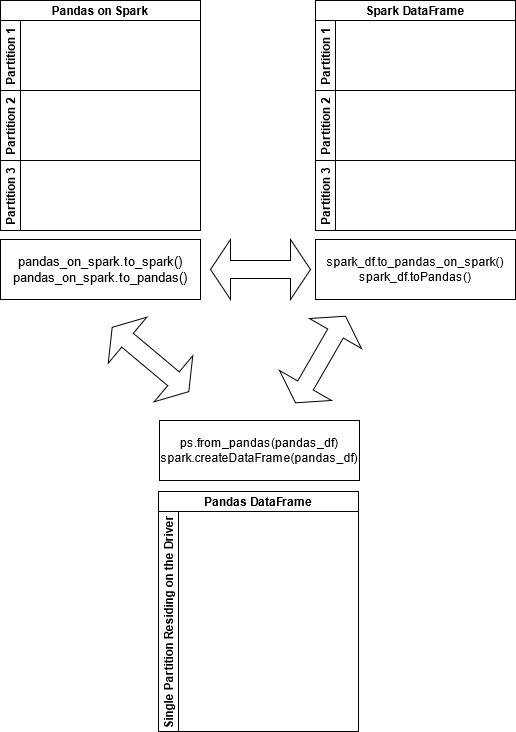

### Converting different types of dataframes to eachother
Each of the 3 types of dataframes can be converted to each other. Use with caution since Pandas dataframes are not distributed.

In [44]:
# pandas_on_spark to spark
spark_pandas_api_df = data_frame
spark_df = spark_pandas_api_df.to_spark()
spark_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+-----------+----+----------+----+---------+------------+------+---------+
| Id|      Model|Year|ScreenSize| RAM|      HDD|Volumne_cuIn|Weight|Weight_kg|
+---+-----------+----+----------+----+---------+------------+------+---------+
|  1|MacBook Pro|2015|       15"|16GB|512GB SSD|        80.0|  4.02|     8.86|
|  2|    MacBook|2016|       12"| 8GB|256GB SSD|        44.0|  2.03|     4.48|
|  3|MacBook Air|2016|     13.3"| 8GB|128GB SSD|        78.0|  2.96|     6.53|
|  4|       iMac|2017|       27"|64GB|  1TB SSD|      4157.0|  20.8|    45.86|
+---+-----------+----+----------+----+---------+------------+------+---------+

/mnt/yarn/usercache/livy/appcache/application_1718239785956_0001/container_1718239785956_0001_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

In [45]:
#Spark API has a different synatx than Pandas API. For example, this is how you slice columns with Spark API.
spark_df.select('Volumne_cuIn', 'Weight').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+------+
|Volumne_cuIn|Weight|
+------------+------+
|        80.0|  4.02|
|        44.0|  2.03|
|        78.0|  2.96|
|      4157.0|  20.8|
+------------+------+

In [46]:
# spark to pandas_on_spark
spark_df.pandas_api()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize   RAM        HDD  Volumne_cuIn  Weight  Weight_kg
0   1  MacBook Pro  2015        15"  16GB  512GB SSD          80.0    4.02       8.86
1   2      MacBook  2016        12"   8GB  256GB SSD          44.0    2.03       4.48
2   3  MacBook Air  2016      13.3"   8GB  128GB SSD          78.0    2.96       6.53
3   4         iMac  2017        27"  64GB    1TB SSD        4157.0   20.80      45.86

In [47]:
# spark to pandas
pandas_df = spark_df.toPandas()
pandas_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize  ...        HDD Volumne_cuIn  Weight  Weight_kg
0   1  MacBook Pro  2015        15"  ...  512GB SSD         80.0    4.02       8.86
1   2      MacBook  2016        12"  ...  256GB SSD         44.0    2.03       4.48
2   3  MacBook Air  2016      13.3"  ...  128GB SSD         78.0    2.96       6.53
3   4         iMac  2017        27"  ...    1TB SSD       4157.0   20.80      45.86

[4 rows x 9 columns]

In [48]:
# pandas_on_spark to pandas
pandas_df = spark_pandas_api_df.to_pandas()
pandas_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize  ...        HDD Volumne_cuIn  Weight  Weight_kg
0   1  MacBook Pro  2015        15"  ...  512GB SSD         80.0    4.02       8.86
1   2      MacBook  2016        12"  ...  256GB SSD         44.0    2.03       4.48
2   3  MacBook Air  2016      13.3"  ...  128GB SSD         78.0    2.96       6.53
3   4         iMac  2017        27"  ...    1TB SSD       4157.0   20.80      45.86

[4 rows x 9 columns]
/mnt/yarn/usercache/livy/appcache/application_1718239785956_0001/container_1718239785956_0001_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

In [49]:
# pandas to pandas_on_spark
ps.from_pandas(pandas_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Id        Model  Year ScreenSize   RAM        HDD  Volumne_cuIn  Weight  Weight_kg
0   1  MacBook Pro  2015        15"  16GB  512GB SSD          80.0    4.02       8.86
1   2      MacBook  2016        12"   8GB  256GB SSD          44.0    2.03       4.48
2   3  MacBook Air  2016      13.3"   8GB  128GB SSD          78.0    2.96       6.53
3   4         iMac  2017        27"  64GB    1TB SSD        4157.0   20.80      45.86

In [50]:
# pandas to spark
spark_df = spark.createDataFrame(pandas_df)
spark_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+-----------+----+----------+----+---------+------------+------+---------+
| Id|      Model|Year|ScreenSize| RAM|      HDD|Volumne_cuIn|Weight|Weight_kg|
+---+-----------+----+----------+----+---------+------------+------+---------+
|  1|MacBook Pro|2015|       15"|16GB|512GB SSD|        80.0|  4.02|     8.86|
|  2|    MacBook|2016|       12"| 8GB|256GB SSD|        44.0|  2.03|     4.48|
|  3|MacBook Air|2016|     13.3"| 8GB|128GB SSD|        78.0|  2.96|     6.53|
|  4|       iMac|2017|       27"|64GB|  1TB SSD|      4157.0|  20.8|    45.86|
+---+-----------+----+----------+----+---------+------------+------+---------+

## Cell magics

In [51]:
%%pretty
data_frame_spark = data_frame.to_spark()
data_frame_spark.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Id,Model,Year,ScreenSize,RAM,HDD,Volumne_cuIn,Weight,Weight_kg
1,MacBook Pro,2015,"15""",16GB,512GB SSD,80.0,4.02,8.86
2,MacBook,2016,"12""",8GB,256GB SSD,44.0,2.03,4.48
3,MacBook Air,2016,"13.3""",8GB,128GB SSD,78.0,2.96,6.53
4,iMac,2017,"27""",64GB,1TB SSD,4157.0,20.8,45.86


In [52]:
%%display
data_frame_spark

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()